In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

PROJECT_DIR = "Documents/Learning/Projects/kido/"
TRAINING_DIR = PROJECT_DIR + "images/train/"
training_datagen = ImageDataGenerator(rescale = 1./255)

DEV_DIR = PROJECT_DIR + "images/dev/"
dev_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'categorical'
)
dev_generator = dev_datagen.flow_from_directory(
    DEV_DIR,
    target_size = (150, 150),
    class_mode = 'categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    # FC layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Output layer
    tf.keras.layers.Dense(26, activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit_generator(
    train_generator, 
    epochs = 25, 
    validation_data = dev_generator,
    verbose = 1
)
model.save("kido.h5")

Found 13412 images belonging to 26 classes.
Found 2600 images belonging to 26 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________________________

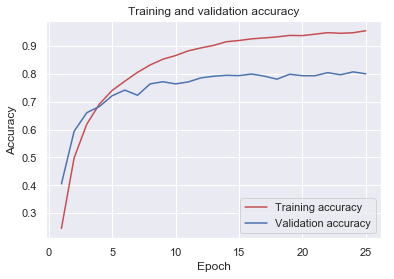

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

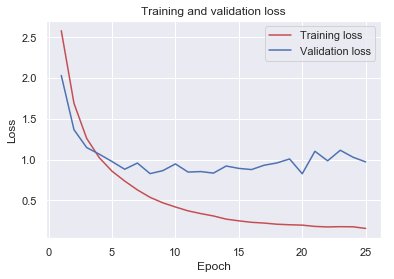

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

path_project = "Documents/Learning/Projects/kido/"
path_figures = path_project + "figures/"


#acc = history.history['acc']
#val_acc = history.history['val_acc']
#loss = history.history['loss']
#val_loss = history.history['val_loss']
acc = [0.2449,0.4977,0.6192,0.6917,0.7403,0.7734,0.8052,0.8319,0.8524,0.8655,0.8824,0.8929,0.902,0.9151,0.9196,0.9255,0.9288,0.9325,0.9378,0.9371,0.9422,0.9478,0.9454,0.9474,0.9546]
val_acc = [0.4046,0.5935,0.6604,0.6827,0.7212,0.7415,0.7231,0.7638,0.7715,0.7638,0.7708,0.7854,0.7912,0.7946,0.7935,0.7992,0.7915,0.7808,0.7985,0.7931,0.7931,0.8042,0.7965,0.8069,0.8]
loss = [2.5808,1.6904,1.2605,1.0219,0.8575,0.7364,0.628,0.5366,0.4695,0.4181,0.3705,0.3371,0.3079,0.2692,0.2482,0.2301,0.2208,0.2067,0.2001,0.1954,0.1797,0.1734,0.1765,0.175,0.1552]
val_loss = [2.0318,1.3668,1.1476,1.0658,0.9758,0.8813,0.9573,0.8276,0.8639,0.9466,0.8465,0.8527,0.8338,0.9208,0.8918,0.8773,0.9308,0.9584,1.0075,0.826,1.102,0.9848,1.1144,1.0292,0.9715]


epochs = list(range(1, len(acc)+1))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(path_figures + 'train_valid_accuracy.png', dpi = 1000)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(path_figures + 'train_valid_loss.png', dpi = 1000)
plt.figure()

